In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import SVG
from IPython.display import display
from IPython.display import HTML
style = "<style>svg{width: 70% !important; height: 50% !important;}</style>" 
HTML(style)
from sklearn.model_selection import train_test_split

In [2]:
#Берем файл со всеми дескрипторами (Из той папки, где код)
data = pd.read_excel('C://Users//plato//Documents//Python Scripts//CH3CN_final//CH3CN_ALL.xlsx', index_col=0) 

In [3]:
merged_df = data[['F01[C-N]', 'H2u', 'B05[O-O]', 'Polar Area(75) (Å²)', 'GATS7p', 'X1Av:(Dragon7)', 'P_VSA_LogP_5:(Dragon7)', 'LnLn']]

In [4]:
#Сохраняем в отдельный файл (он сохранится в ту папку, в которой этот код)
merged_df.to_excel(f'CH3CN_RFR.xlsx', index=True)

In [5]:
#Загружаем наш сохраненный файл
BDP_data = pd.read_excel('C://Users//plato//Documents//Python Scripts//CH3CN_final//CH3CN_RFR.xlsx', index_col=0) 
BDP_data.head()

,F01[C-N],H2u,B05[O-O],Polar Area(75) (Å²),GATS7p,X1Av:(Dragon7),P_VSA_LogP_5:(Dragon7),LnLn
SR No,,,,,,,,
2,4,2.052,0,59.76,1.454,0.302,6.371,0.078814
3,4,2.763,0,70.07,1.300,0.301,12.740,0.160491
4,5,3.021,0,111.35,1.437,0.287,15.500,1.468449
5,5,2.998,0,96.42,1.253,0.287,15.500,0.730410
6,5,2.736,0,97.37,1.335,0.287,15.500,0.770710


<Axes: xlabel='LnLn'>

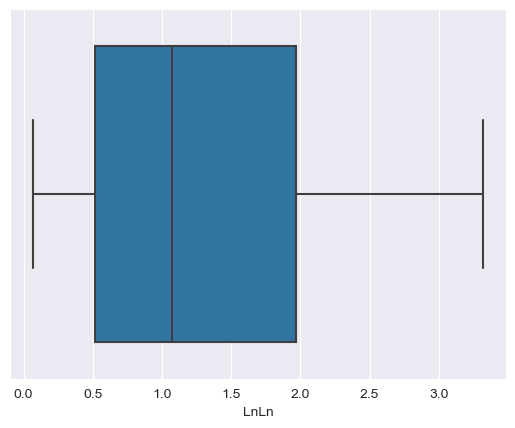

In [6]:
sns.boxplot(x = BDP_data['LnLn'])

In [7]:
# Create correlation matrix
# Берем абсолютные значения, тк чем ближе к 0, тем меньше корелляция
corr_matrix = BDP_data.corr().abs()
corr_matrix.head

<bound method NDFrame.head of                         F01[C-N]       H2u  B05[O-O]  Polar Area(75) (Å²)  \
F01[C-N]                1.000000  0.084938  0.176271             0.127753   
H2u                     0.084938  1.000000  0.163261             0.340779   
B05[O-O]                0.176271  0.163261  1.000000             0.062163   
Polar Area(75) (Å²)     0.127753  0.340779  0.062163             1.000000   
GATS7p                  0.328437  0.536444  0.154392             0.047570   
X1Av:(Dragon7)          0.409035  0.022794  0.022312             0.427998   
P_VSA_LogP_5:(Dragon7)  0.353393  0.582256  0.426198             0.318138   
LnLn                    0.564307  0.441692  0.206077             0.013880   

                          GATS7p  X1Av:(Dragon7)  P_VSA_LogP_5:(Dragon7)  \
F01[C-N]                0.328437        0.409035                0.353393   
H2u                     0.536444        0.022794                0.582256   
B05[O-O]                0.154392        0.022312

In [8]:
#Убираем дескрипторы с высокой корелляцией( это хорошо для лин регрессии, а в рф потеря информации)
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
# Drop features 
BDP_data1 = BDP_data.drop(BDP_data[to_drop], axis=1)

In [9]:
BDP_data1

,F01[C-N],H2u,B05[O-O],Polar Area(75) (Å²),GATS7p,X1Av:(Dragon7),P_VSA_LogP_5:(Dragon7),LnLn
SR No,,,,,,,,
2,4,2.052,0,59.76,1.454,0.302,6.371,0.078814
3,4,2.763,0,70.07,1.300,0.301,12.740,0.160491
4,5,3.021,0,111.35,1.437,0.287,15.500,1.468449
5,5,2.998,0,96.42,1.253,0.287,15.500,0.730410
6,5,2.736,0,97.37,1.335,0.287,15.500,0.770710
7,6,2.994,0,117.95,1.474,0.276,18.260,1.074328
8,6,2.674,0,93.28,1.354,0.295,21.360,0.876791
9,6,2.732,0,69.66,1.382,0.295,30.840,0.618842
10,4,3.480,0,99.11,1.227,0.298,28.990,0.327805


In [10]:
#разделяем на целевую переменную и дескрипторы
y = BDP_data1.LnLn
X = BDP_data1.drop(['LnLn'], axis=1)
#делаем тренировочную выборку
X_train = X.drop([5, 8, 13, 20, 48, 25, 16, 74], axis=0)
#делаем тренировочную целевую переменную
y_train = y.drop([5, 8, 13, 20, 48, 25, 16, 74], axis=0)
#делаем тестовую выборку
X_test = X.loc[[5, 8, 13, 20, 48, 25, 16, 74]]
#делаем тестовую целевую переменную
y_test = y.loc[[5, 8, 13, 20, 48, 25, 16, 74]]

In [11]:
#Обучаем случайный лес чтобы получить наилучшие параметры !главное не запустить случайно, долго делается!
#train_r2 = 0.0
#test_r2 = 0.0

#from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import GridSearchCV, train_test_split
#from sklearn.metrics import make_scorer, r2_score
#import numpy as np
#while train_r2 <= 0.5 or test_r2 <= 0.5:
    # Предположим, что X и y уже определены
    # Задаем модель случайного леса
#    rf_regressor = RandomForestRegressor()
    # Задаем сетку параметров для поиска
#    param_grid = {
#        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
#        'max_depth': [None, 1, 2, 3, 4, 5, 6, 7],
#        'min_samples_split': [2, 5],
#        'min_samples_leaf': [1, 2, 4],
#        'max_features': [1.0, 'sqrt', 'log2']
#    }
    # Задаем метрику для оценки качества модели
#    scorer = make_scorer(r2_score)
    # Инициируем объект GridSearchCV
#    grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)
    # Выполняем поиск наилучшиххх параметров
#    grid_search.fit(X_train, y_train)
    # Получаем наилучшие параметры
#    best_params = grid_search.best_params_
    # Инициируем и обучаем модель с наилучшими параметрами
#    best_rf_regressor = RandomForestRegressor(**best_params)
#    best_rf_regressor.fit(X_train, y_train)
    # Оцениваем качество модели на тестовой выборке
#    y_pred = best_rf_regressor.predict(X_test)
#    r2 = r2_score(y_test, y_pred)
    # Вычисляем коэффициенты детерминации для тренировочной и тестовой выборок
#    y_train_pred = best_rf_regressor.predict(X_train)
#    train_r2 = r2_score(y_train, y_train_pred)
#    y_test_pred = best_rf_regressor.predict(X_test)
#    test_r2 = r2_score(y_test, y_test_pred)
# Выводим текущие значения коэффициентов детерминации
#print("Best parameters:", best_params)
#print("Train R^2:", train_r2)
#print("Test R^2:", test_r2)

In [12]:
#сохранить модель
#import joblib
#joblib.dump(best_rf_regressor, "best_rf_regressor_RF_CH3CN_Ln_R2test_06160745634506041_17_04_3")

In [13]:
#train_r2 = 0.0
#test_r2 = 0.0
# Обучаем случайный лес на лучших параметрах пока R2 не станут классными
#while train_r2 <= 0.7 or test_r2 <= 0.87:
    # Задаем модель случайного леса
#    rf_regressor = RandomForestRegressor()    
    # Создаем и обучаем модель случайного леса
#    parameters = {
#    'n_estimators': [6],
#    'max_depth': [6],
#    'min_samples_split': [5],
#    'min_samples_leaf': [1],
#    'max_features': ['log2']}
    # Задаем метрику для оценки качества модели
#    scorer = make_scorer(r2_score)
    # Инициируем объект GridSearchCV
#    grid_search = GridSearchCV(estimator=rf_regressor, param_grid=parameters, scoring=scorer, cv=5, n_jobs=-1)
#    grid_search.fit(X_train, y_train)
    # Вычисляем коэффициенты детерминации для тренировочной и тестовой выборок
#    y_train_pred = grid_search.predict(X_train)
#    train_r2 = r2_score(y_train, y_train_pred)
#    y_test_pred = grid_search.predict(X_test)
#    test_r2 = r2_score(y_test, y_test_pred)
# Выводим текущие значения коэффициентов детерминации
#print("Train R^2:", train_r2)
#print("Test R^2:", test_r2)

In [14]:
#сохранить модель
#import joblib
#joblib.dump(grid_search, "RFR_CH3CN_LnLn_R2test_07290543171855385_17_04_2")

In [15]:
#загрузить модель из той же папки, где код
import joblib
loaded_rf = joblib.load("RFR_CH3CN_LnLn_R2test_08701868939767992_17_04_3")

In [16]:
from sklearn.metrics import make_scorer, r2_score
y_train_pred = loaded_rf.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)
y_test_pred = loaded_rf.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)
print("Train R^2 loaded:", train_r2)
print("Test R^2 loaded:", test_r2)

Train R^2 loaded: 0.7835646182555063
Test R^2 loaded: 0.8701868939767992


In [17]:
import sklearn.metrics as metrics
metrics.mean_squared_error(y_train, y_train_pred) #Mean squared error regression loss
from math import sqrt
from sklearn.metrics import mean_squared_error

rmse_train = sqrt(mean_squared_error(y_train, y_train_pred))
print(f"RMSE_train: {rmse_train}")
rmse_test = sqrt(mean_squared_error(y_test, y_test_pred))
print(f"RMSE_test: {rmse_test}")

RMSE_train: 0.4359561351790359
RMSE_test: 0.300641100765439


In [18]:
R2_adj = 1 - ( 1-train_r2 ) * ( len(y_train) - 1 ) / ( len(y_train) - X_train.shape[1] - 1 )
print("R^2 adjusted:", R2_adj)

R^2 adjusted: 0.717692980333269


In [19]:
#Максимальная ошибка предсказания
import sklearn.metrics as metrics
MaxAE = metrics.max_error(y_train, y_train_pred)  #max_error metric calculates the maximum residual error
print(f"MaxAE: {MaxAE}")
#Средняя абсолютная ошибка предсказания
MAE = metrics.mean_absolute_error(y_train, y_train_pred) #Mean absolute error regression loss
print(f"MAE: {MAE}")

MaxAE: 1.0884289412093497
MAE: 0.3418793496022513


In [20]:
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

In [21]:
mape_train = calculate_mape(y_train, y_train_pred)
mape_test = calculate_mape(y_test, y_test_pred)
print(f"MAPE for the training dataset: {mape_train}")
print(f"MAPE for the test dataset: {mape_test}")

MAPE for the training dataset: 59.32876986351736
MAPE for the test dataset: 61.51235711163675


In [22]:
# наилучшие параметры RF
loaded_rf.best_params_

{'max_depth': 6,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 6}

In [23]:
#Считаем важность дескрипторов
best_rf_model = loaded_rf.best_estimator_
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import make_scorer, r2_score
import numpy as np
#создаем веса для дескрипторов (важность каждого дескриптора)
feature_importances = best_rf_model.feature_importances_
feature_importances_df = pd.DataFrame({'features': X_test.columns.values,
                                  'feature_importances':feature_importances})
importances = feature_importances_df.sort_values('feature_importances', ascending=False)
importances

,features,feature_importances
1,H2u,0.395814
6,P_VSA_LogP_5:(Dragon7),0.198839
0,F01[C-N],0.197453
3,Polar Area(75) (Å²),0.101657
4,GATS7p,0.066820
5,X1Av:(Dragon7),0.039418
2,B05[O-O],0.000000


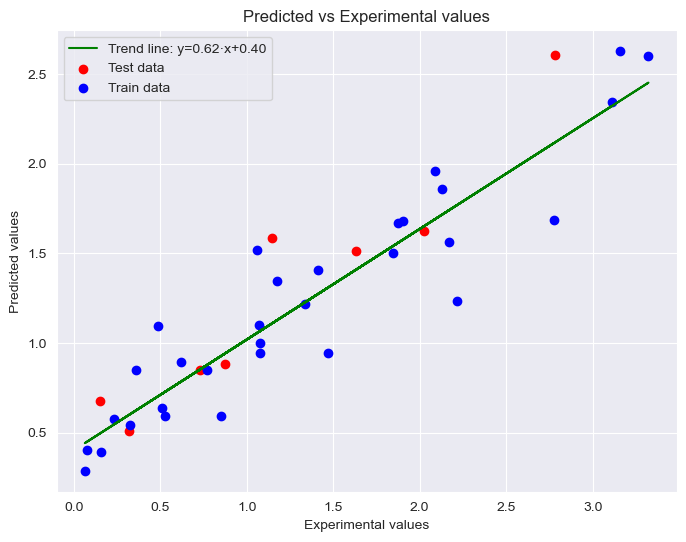

intercept: 0.40118115269330784
slope: 0.617417397511988


In [24]:
import matplotlib.pyplot as plt

# Строим график
plt.figure(figsize=(8, 6))
# Выполнение линейной аппроксимации
slope, intercept = np.polyfit(y_train, y_train_pred, 1)
plt.plot(y_train, slope * y_train + intercept, color='green', label='Trend line: y=0.62·x+0.40')
plt.scatter(y_test, y_test_pred, color='red', label='Test data')
plt.scatter(y_train, y_train_pred, color='blue', label='Train data')
plt.title('Predicted vs Experimental values')
plt.xlabel('Experimental values')
plt.ylabel('Predicted values')
plt.legend()
plt.grid(True)
plt.show()

print(f"intercept: {intercept}")
print(f"slope: {slope}")

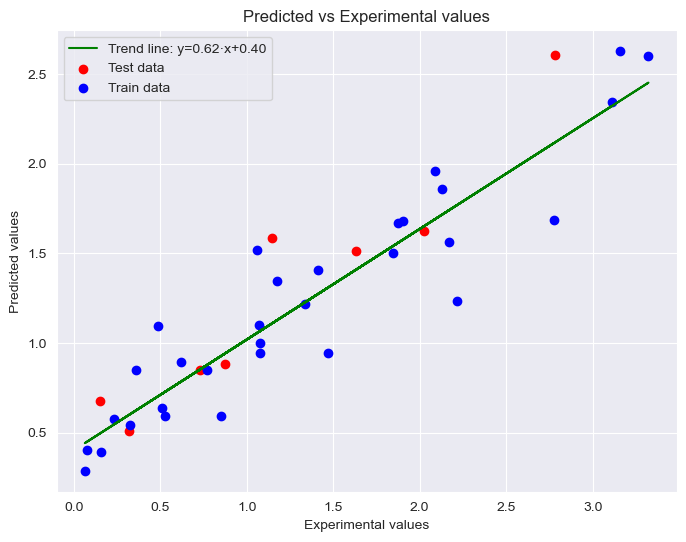

In [25]:
#Сохраняет в PDF в высоком качестве
import matplotlib.pyplot as plt

# Строим график
plt.figure(figsize=(8, 6))
# Выполнение линейной аппроксимации
slope, intercept = np.polyfit(y_train, y_train_pred, 1)
plt.plot(y_train, slope * y_train + intercept, color='green', label='Trend line: y=0.62·x+0.40')
plt.scatter(y_test, y_test_pred, color='red', label='Test data')
plt.scatter(y_train, y_train_pred, color='blue', label='Train data')
plt.title('Predicted vs Experimental values')
plt.xlabel('Experimental values')
plt.ylabel('Predicted values')
plt.legend()
plt.grid(True)

# Сохранение графика в PDF
plt.savefig('CH3CN_RFR_graph.pdf')

# Отображение графика (необязательно)
plt.show()

In [26]:
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import GridSearchCV, train_test_split
#from sklearn.metrics import make_scorer, r2_score
#from sklearn.metrics import r2_score as r2
#r2_score = 0
#q2 = 0
# Предполагается, что X_train и y_train уже определены и предобработаны
#while r2_score <= 0.5:
    # Создаем пустой датафрейм для предсказаний
#    y_predict = pd.DataFrame(columns=['Predicted'])

    # Цикл для исключения одного элемента и обучения модели
#    for index_to_exclude in X_train.index:
            # Создаем новую выборку, исключая текущий элемент
#            X_train_subset = X_train.drop([index_to_exclude], axis=0)
#            y_train_subset = y_train.drop([index_to_exclude], axis=0)
#            X_solo = X_train.loc[[index_to_exclude]]
#            parameters = {'n_estimators': [6], 'max_depth': [6], 'min_samples_split': [5], 'min_samples_leaf': [1], 'max_features': ['log2']}
#            rfr = RandomForestRegressor()
#            grid_search = GridSearchCV(estimator=rfr, param_grid=parameters, cv=None)
            # Обучаем модель на подвыборке
#            grid_search.fit(X_train_subset, y_train_subset)
            # Предсказываем значение для исключенного элемента
#            y_pred = grid_search.predict(X_solo)
            # Добавляем предсказание в датафрейм
#            y_predict.loc[index_to_exclude] = y_pred
#    r2_score = r2(y_train, y_predict)
#    r2_score
#    if r2_score > q2:
#        q2 = r2_score
#        print('q2 =', q2)

q2 = 0.16670588120427632
q2 = 0.2317467177969179
q2 = 0.38161221793602607


KeyboardInterrupt: 

In [27]:
loaded_rf

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [6], 'max_features': ['log2'],
                         'min_samples_leaf': [1], 'min_samples_split': [5],
                         'n_estimators': [6]},
             scoring=make_scorer(r2_score))

In [28]:
feature_names = BDP_data1.columns.values[:-1]

In [29]:
feature_names 

array(['F01[C-N]', 'H2u', 'B05[O-O]', 'Polar Area(75) (Å²)', 'GATS7p',
       'X1Av:(Dragon7)', 'P_VSA_LogP_5:(Dragon7)'], dtype=object)

In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from alibi.explainers import ALE, plot_ale

In [31]:
rf_ale = ALE(loaded_rf.predict, feature_names=feature_names, target_names=['LnLn'])

In [32]:
X_train1 = X_train.to_numpy()

In [33]:
rf_exp = rf_ale.explain(X_train1)

C:\Users\plato\anaconda3\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\plato\anaconda3\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\plato\anaconda3\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\plato\anaconda3\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\plato\anaconda3\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\plato\anaconda3\Lib\site-packages\sklearn\base.py:420: U

In [35]:
plot_ale(rf_exp, n_cols=4, fig_kw={'figwidth':14, 'figheight': 7});

# Сохранение графика в PDF
plt.savefig('CH3CN_RFR_ale_plot.pdf', format='pdf')

# Если необходимо закрыть окно с графиком после сохранения
plt.close()

In [36]:
best_estimator = loaded_rf.best_estimator_
feature_importances = best_estimator.feature_importances_
max_importance_index = feature_importances.argmax()
most_important_feature = feature_names[max_importance_index]

In [37]:
print("The most important feature is:", most_important_feature)

The most important feature is: H2u


In [38]:
import shap
shap.initjs()

In [39]:
model = loaded_rf.best_estimator_

In [40]:
explainer = shap.Explainer(model)
shap_test = explainer(X_test)
print(f"Shap values length: {len(shap_test)}\n")
print(f"Sample shap value:\n{shap_test[0]}")

Shap values length: 8

Sample shap value:
.values =
array([-0.02013924, -0.35348204,  0.        , -0.01644492, -0.07515484,
       -0.0713819 ,  0.03728082])

.base_values =
1.351289351544366

.data =
array([ 5.   ,  2.998,  0.   , 96.42 ,  1.253,  0.287, 15.5  ])


In [41]:
print(f"Expected value: {explainer.expected_value[0]:.1f}")
print(f"Average target value (training data): {y_train.mean():.1f}")
print(f"Base value: {np.unique(shap_test.base_values)[0]:.1f}")

Expected value: 1.4
Average target value (training data): 1.3
Base value: 1.4


In [42]:
(shap_test.data == X_test).describe()

,F01[C-N],H2u,B05[O-O],Polar Area(75) (Å²),GATS7p,X1Av:(Dragon7),P_VSA_LogP_5:(Dragon7)
count,8,8,8,8,8,8,8
unique,1,1,1,1,1,1,1
top,True,True,True,True,True,True,True
freq,8,8,8,8,8,8,8


In [43]:
pd.DataFrame(shap_test.data, columns=shap_test.feature_names, 
             index=X_test.index)

,F01[C-N],H2u,B05[O-O],Polar Area(75) (Å²),GATS7p,X1Av:(Dragon7),P_VSA_LogP_5:(Dragon7)
SR No,,,,,,,
5,5.0,2.998,0.0,96.42,1.253,0.287,15.50
8,6.0,2.674,0.0,93.28,1.354,0.295,21.36
13,4.0,3.829,1.0,103.72,1.173,0.294,61.47
20,7.0,3.435,0.0,86.29,1.201,0.301,12.25
48,7.0,4.057,0.0,88.64,1.127,0.312,19.79
25,4.0,3.426,0.0,117.96,1.124,0.281,14.70
16,7.0,3.020,0.0,76.43,1.304,0.297,12.25
74,4.0,3.818,0.0,120.00,1.142,0.285,44.84


In [44]:
shap_df = pd.DataFrame(shap_test.values, 
                       columns=shap_test.feature_names, 
                       index=X_test.index)
shap_df

,F01[C-N],H2u,B05[O-O],Polar Area(75) (Å²),GATS7p,X1Av:(Dragon7),P_VSA_LogP_5:(Dragon7)
SR No,,,,,,,
5,-0.020139,-0.353482,0.0,-0.016445,-0.075155,-0.071382,0.037281
8,-0.016654,-0.455384,0.0,-0.016445,-0.075155,-0.052703,0.148251
13,-0.105781,0.402234,0.0,0.034598,0.134848,-0.108954,-0.084942
20,0.465248,-0.460632,0.0,-0.009509,0.107537,0.010975,0.120366
48,0.356936,0.501430,0.0,-0.016916,-0.035108,0.030957,0.416197
25,-0.242967,-0.447207,0.0,-0.044935,-0.027392,-0.069196,-0.008359
16,0.490367,-0.396008,0.0,-0.016445,-0.057183,0.021232,0.120366
74,-0.122906,-0.151678,0.0,-0.088777,-0.010817,-0.147051,-0.155879


In [45]:
np.isclose(model.predict(X_test), 
           explainer.expected_value[0] + shap_df.sum(axis=1))

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [46]:
columns = shap_df.apply(np.abs).mean()\
                 .sort_values(ascending=False).index

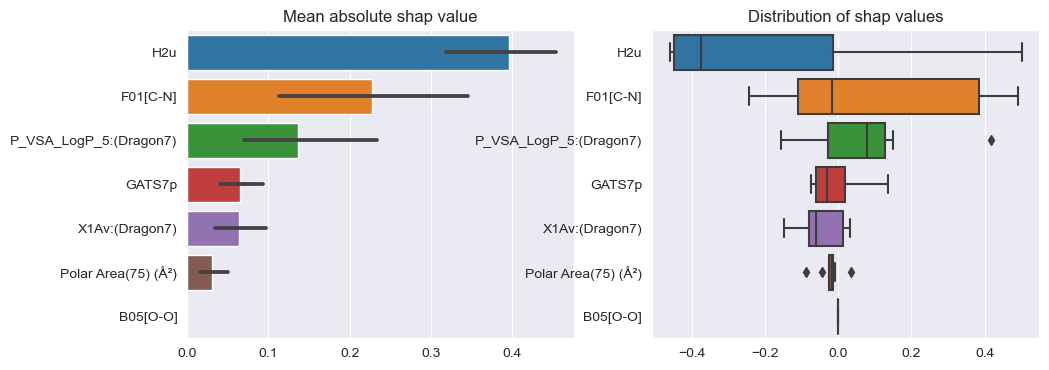

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(11,4))
sns.barplot(data=shap_df[columns].apply(np.abs), orient='h', 
            ax=ax[0])
ax[0].set_title("Mean absolute shap value")
sns.boxplot(data=shap_df[columns], orient='h', ax=ax[1])
ax[1].set_title("Distribution of shap values");

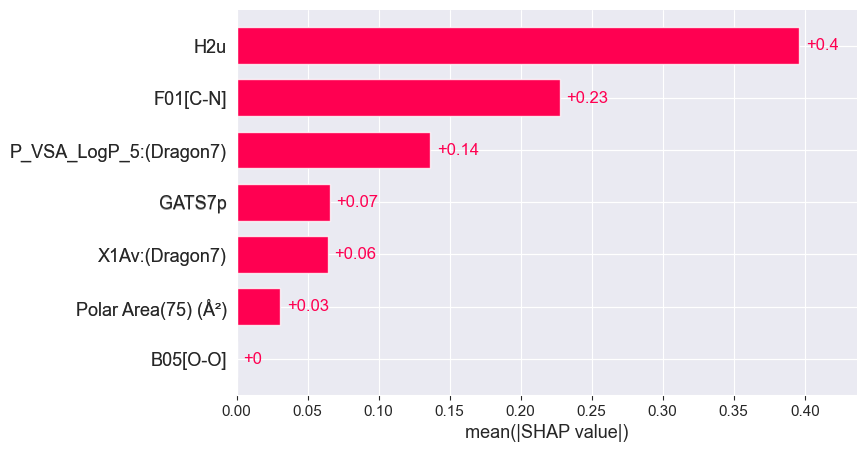

In [48]:
shap.plots.bar(shap_test)

In [54]:
import shap
import matplotlib.pyplot as plt

# Предположим, что у вас уже есть обученная модель, X_test и shap_values

# Создаем фигуру
plt.figure()

# Построение SHAP summary plot
shap.summary_plot(shap_test, X_test, show=False)  # Убедитесь, что show=False

# Сохранение графика в PDF
plt.savefig('CH3CN_RFR_SHAP_test_plot.pdf', format='pdf')

# Если необходимо закрыть окно с графиком после сохранения
plt.close()

In [ ]:
shap.summary_plot(shap_test, cmap=plt.get_cmap("winter_r"))

In [ ]:
shap.summary_plot(shap_test, plot_type='violin')

In [ ]:
shap.plots.heatmap(shap_test)

In [ ]:
shap.plots.heatmap(shap_test, cmap=plt.get_cmap("winter_r"))

In [ ]:
shap.force_plot(explainer.expected_value, shap_test.values, 
                X_test)

In [ ]:
shap.plots.bar(shap_test[0])